In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot

In [10]:
df = pd.read_csv("groupeddf.csv")
df = df.dropna()
uniqueVals = df["Code"].unique()  
len(uniqueVals)
df=df.set_index("Code") #for loc function, creted index

In [16]:
def arima_model(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1 ,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    return predictions

In [17]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

('Company name : ', '3IINFOTECH')


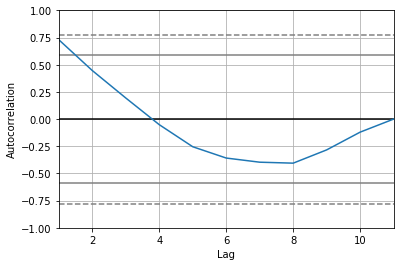

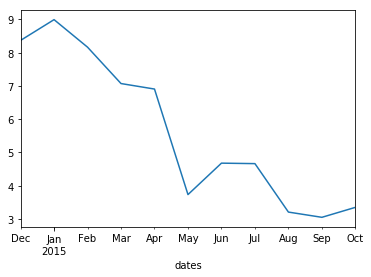

predicted=2.521238, expected=4.663048
predicted=3.813087, expected=3.206145
predicted=2.901418, expected=3.048606
predicted=2.162019, expected=3.348171
Test RMSE: 1.263


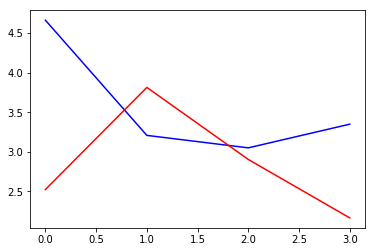

('Company name : ', '8KMILES')


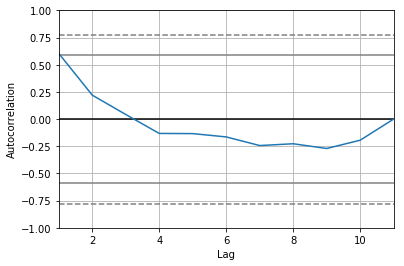

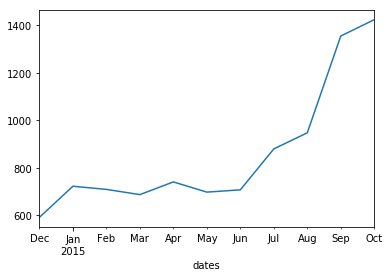

predicted=721.484519, expected=879.681825
predicted=863.211695, expected=947.393459
predicted=990.871242, expected=1354.689960
predicted=1500.078689, expected=1423.700000
Test RMSE: 206.344


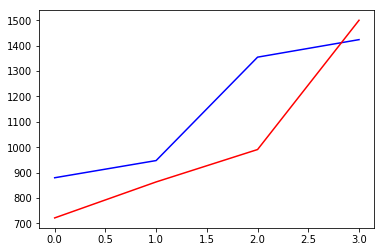

('Company name : ', 'ABAN')


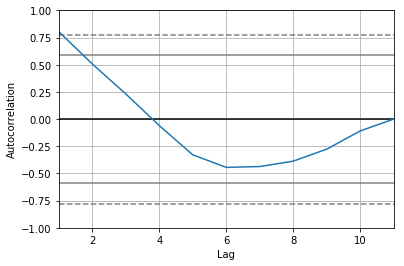

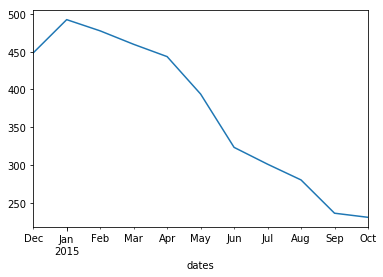

predicted=270.351938, expected=301.090843
predicted=282.760114, expected=280.225539
predicted=262.294744, expected=236.175711
predicted=205.946969, expected=230.738636
Test RMSE: 23.707


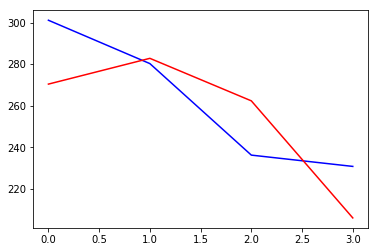

('Company name : ', 'ABB')


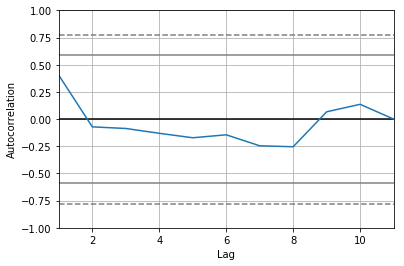

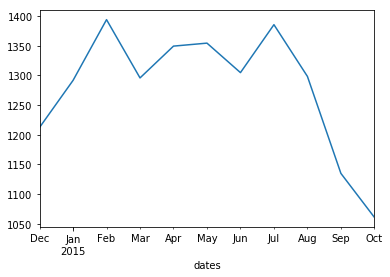

predicted=1340.507887, expected=1385.768171
predicted=1381.581623, expected=1298.446334
predicted=1363.649699, expected=1134.712187
predicted=1139.773099, expected=1060.549670
Test RMSE: 130.047


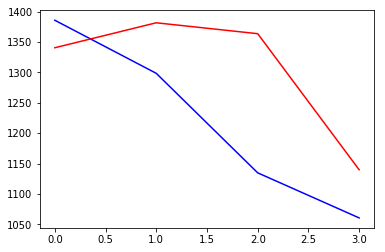

('Company name : ', 'ABBOTINDIA')


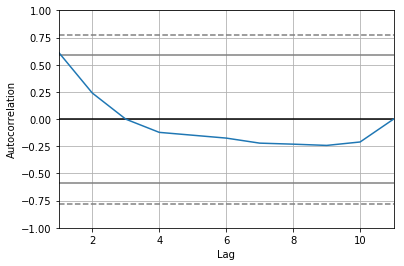

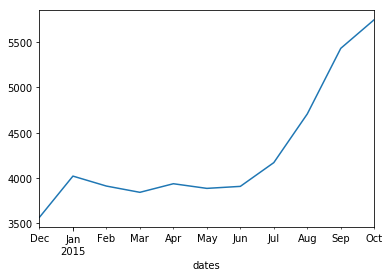

predicted=3939.386980, expected=4168.029799
predicted=4103.432442, expected=4706.805640
predicted=4982.866578, expected=5432.858477
predicted=6008.210127, expected=5750.471627
Test RMSE: 413.902


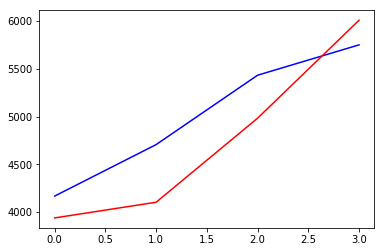

('Company name : ', 'ABIRLANUVO')


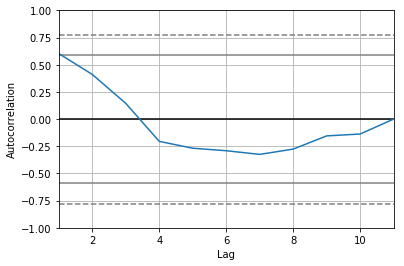

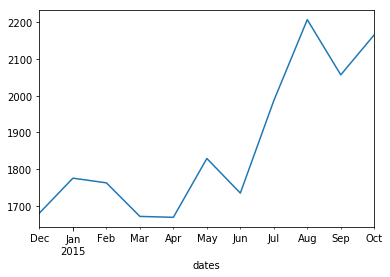

predicted=1783.606290, expected=1986.509671
predicted=1871.718999, expected=2207.243481
predicted=2270.414398, expected=2056.686745
predicted=2149.977381, expected=2165.988874
Test RMSE: 223.429


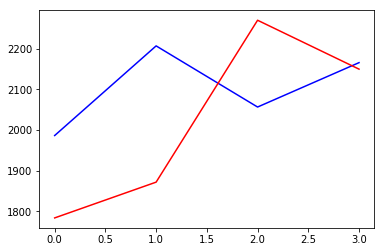

('Company name : ', 'ACC')


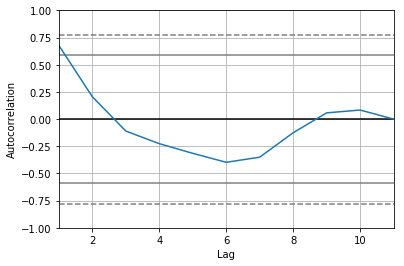

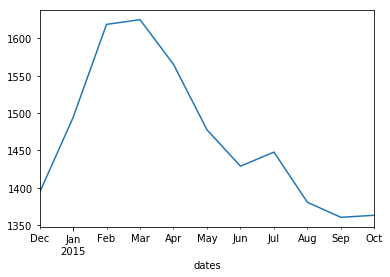

predicted=1400.998371, expected=1447.831689
predicted=1468.668337, expected=1380.824427
predicted=1343.550403, expected=1360.764711
predicted=1352.164346, expected=1363.489227
Test RMSE: 50.829


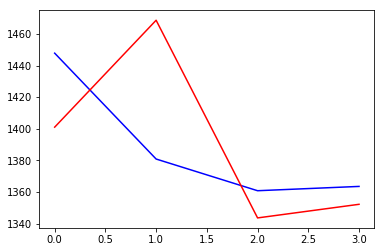

('Company name : ', 'ADANIENT')


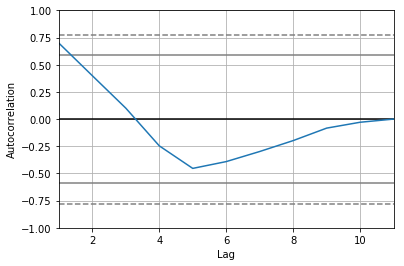

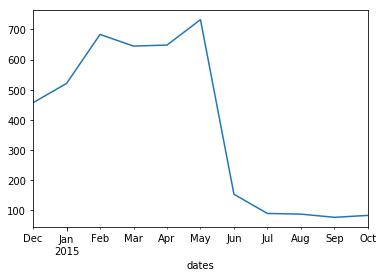

predicted=323.819175, expected=87.778453
predicted=34.822433, expected=85.496667
predicted=34.301326, expected=74.907830
predicted=29.162336, expected=81.238575
Test RMSE: 125.144


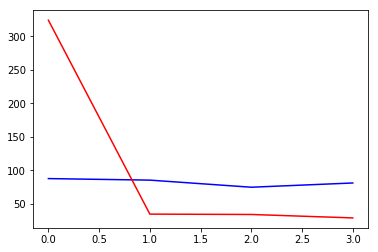

('Company name : ', 'ADANIPORTS')


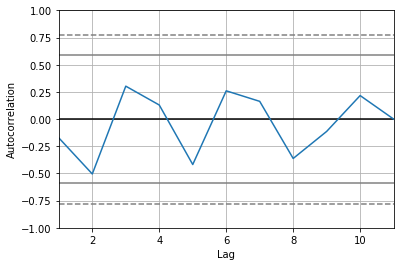

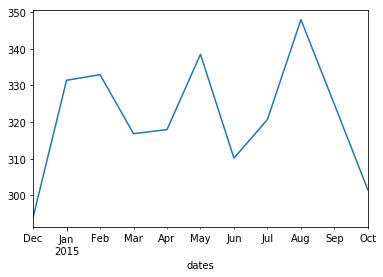

predicted=327.252487, expected=320.662572
predicted=319.139901, expected=347.915965
predicted=347.766287, expected=324.793705
predicted=339.748991, expected=301.446800
Test RMSE: 26.769


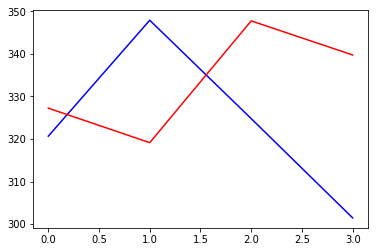

('Company name : ', 'ADANIPOWER')


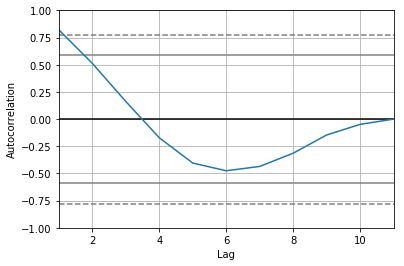

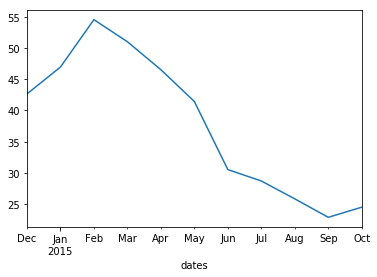

predicted=23.373873, expected=28.724432
predicted=27.100861, expected=25.864922
predicted=23.708737, expected=22.915710
predicted=20.645659, expected=24.532650
Test RMSE: 3.387


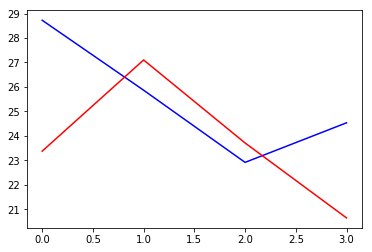

In [31]:
for company in uniqueVals[:10]:
    data=(df.loc[company,:]).reset_index()
    print "Company name : " company
    data['Price'] = data['Close']
    data['Date'] = data['Date'].map(lambda x: str(x)[:7])
    Quantity_date = data[['Price','Date']]
    Quantity_date_count=Quantity_date.groupby(['Date'])['Price'].aggregate('mean').reset_index().sort_values(by='Date', ascending=0)
    date=list(Quantity_date_count['Date'])
    quantity=list(Quantity_date_count['Price'])
    date_quantity = pd.DataFrame({'dates': date, 'quantity':quantity})
    date_quantity.index = date_quantity['dates'].map(lambda x: parser(x))
    date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: float(x))
    date_quantity = date_quantity.fillna(date_quantity.bfill())
    date_quantity = date_quantity['quantity'].resample('MS').mean()
    #plot autosorelation plot
    autocorrelation_plot(date_quantity)
    plt.show()
    #date and prices plot
    date_quantity.plot()
    plt.show()
    #train and test data
    quantity = date_quantity.values
    size = int(len(quantity) * 0.66)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #fit in model
    predictions = arima_model(train, test)
    #rmse calculation
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % error)
    #plot graph
    plt.plot(test,color='blue' )
    plt.plot(predictions, color='red')
    plt.show()